# CS 452/552 Data Science with Python: Homework 1

<b> Name: </b> Esrah Zahid <br>
<b> Student ID: </b> S020289 

Download data files from LMS. Code/Explain your solution over this `IPython` notebook at required cells, and complete locally.

To submit your assignment, in LMS, upload your solution to LMS as a single notebook with following file name format:

`lastName_firstName_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 452 or CS 552).

Problems on homework assignments are equally weighted. `The Challenge Question is required for CS 552 students and optional for all others.`

Any type of plagiarism will not be tolerated. Your submitted codes will be compared with other submissions and also the codes available on internet and violations will have a penalty of -100 points. (In case of copying from
another student both parties will get -100)

Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plt

## Problem 1: Inside the Models in Scikit-learn

In this problem, we will be implementing K-Nearest Neighbour and simple linear regression for predicting a quantitative variable. We will compare the performance of our implementation with those of Scikit-learn (``sklearn``).

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y. 

### Part (a): Implement the models by hand
In this part you **may not** use ``sklearn`` for any task.

In the following, you may use ``numpy`` arrays instead of ``pandas`` dataframes.

- Implement a funtion ``split``, which satifies:
    - input: an ``nx2`` dataframe ``data``, a float ``m``
    - return: an ``nx2`` dataframe ``train`` and an ``nx2`` dataframe ``test``, consisting of ``m`` percent and ``100 - m`` percent of the data, respectively.


- Implement K-Nearest Neighbour for predicting a quantitative variable. That is, write a function, ``knn_predict``, that satisfies:
    - input: an integer ``k``, an ``n x 2`` dataframe training set ``train``, an ``n x 1`` dataframe testing set ``test``
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.



- Implement linear regression for predicting a quantitative variable. That is, write a function ``linear_reg_fit`` that satisfies:
    - input: an ``nx2`` dataframe training set ``train``
    - return: the coefficients of the linear regression model - a float ``slope`` and a float ``intercept``.
    
    
- Write a function ``linear_reg_predict`` that satisfies:
    - input: an ``nx1`` dataframe testing set ``test``, as well as the coefficients of the linear regression model
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.
    
    
- Implement a function ``score`` that satisfies:
    - input: an ``nx2`` dataframe ``predicted``, an ``nx2`` dataframe ``actual`` 
    - return: R^2 coefficient of the fit of the predicted values.

**Solution:**

In [2]:
def split(data, m):
    test_size = int(len(data) * m)
    test = data.iloc[:test_size]
    train = data.iloc[test_size:]
    return train, test

def knn_predict(k, train, test):
    def euclidean_distance(a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    def nearest_neighbours(k, point, data):
        distances = [euclidean_distance(point, row[:-1]) for index, row in data.iterrows()]
        sorted_indices = np.argsort(distances)[:k]
        return data.iloc[sorted_indices], np.array(distances)[sorted_indices]

    def weighted_average(neighbours, distances):
        weights = 1 / (distances ** 2)
        return np.dot(weights, neighbours.iloc[:, -1]) / np.sum(weights)

    predictions = []
    for x, row in test.iterrows():
        neighbours, distances = nearest_neighbours(k, row, train)
        prediction = weighted_average(neighbours, distances)
        predictions.append([row[0], prediction])

    return pd.DataFrame(predictions, columns=["Test", "Predictions"])


def linear_reg_fit(train):
    X = train.iloc[:, 0]
    Y = train.iloc[:, 1]
    x_mean = np.mean(X)
    y_mean = np.mean(Y)

    slope = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean) ** 2)
    intercept = y_mean - slope * x_mean

    return slope, intercept

def linear_reg_predict(test, slope, intercept):
    predictions = []
    for x, row in test.iterrows():
        prediction = slope * row[0] + intercept
        predictions.append([row[0], prediction])

    return pd.DataFrame(predictions, columns=["X", "Y"])

def score(predicted, actual):
    y_pred = predicted.iloc[:, 1].values
    y_true = actual.iloc[:, 1].values
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

### Part (b): Compare with ``sklearn``

- Load the contents of ``dataset_1_full.txt`` into a ``pandas`` dataframe, or ``numpy`` array. 


- Use your functions from Part (a) to split the data into training and testing sets (70-30). Evaluate how KNN and linear regression each perform on this dataset.


- Use ``sklearn`` to split the data into training and testing sets (70-30). Use ``sklearn`` to evaluate how KNN and linear regression each perform on this dataset.


- Use Python's ``time`` library to measure how well your implementations compare with that of ``sklearn``. What can you do (algorithmically or codewise) to make your implementation faster or more efficient?

**Solution:**

In [3]:
# Load the dataset
data = pd.read_csv('dataset/dataset_1_full.txt')
data.columns = ['X', 'Y']

train_custom, test_custom = split(data, 0.7)
train_sklearn, test_sklearn = train_test_split(data, test_size=0.3)

start_time_custom_knn = time.time()
k = 5
predicted_custom_knn = knn_predict(k, train_custom, test_custom)
score_custom_knn = score(predicted_custom_knn, test_custom)
end_time_custom_knn = time.time()

start_time_sklearn_knn = time.time()
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_sklearn[['X']], train_sklearn['Y'])
predicted_sklearn_knn = knn.predict(test_sklearn[['X']])
score_sklearn_knn = r2_score(test_sklearn['Y'], predicted_sklearn_knn)
end_time_sklearn_knn = time.time()

start_time_custom_lr = time.time()
slope, intercept = linear_reg_fit(train_custom)
predicted_custom_lr = linear_reg_predict(test_custom, slope, intercept)
score_custom_lr = score(predicted_custom_lr, test_custom)
end_time_custom_lr = time.time()

start_time_sklearn_lr = time.time()
lr = LinearRegression()
lr.fit(train_sklearn[['X']], train_sklearn['Y'])
predicted_sklearn_lr = lr.predict(test_sklearn[['X']])
score_sklearn_lr = r2_score(test_sklearn['Y'], predicted_sklearn_lr)
end_time_sklearn_lr = time.time()

print("Custom KNN R^2 score:", score_custom_knn)
print("Sklearn KNN R^2 score:", score_sklearn_knn)
print("")
print("Custom Linear Regression R^2 score:", score_custom_lr)
print("Sklearn Linear Regression R^2 score:", score_sklearn_lr)
print("")
print("Custom KNN time:", end_time_custom_knn - start_time_custom_knn)
print("Sklearn KNN time:", end_time_sklearn_knn - start_time_sklearn_knn)
print("")
print("Custom Linear Regression time:", end_time_custom_lr - start_time_custom_lr)
print("Sklearn Linear Regression time:", end_time_sklearn_lr - start_time_sklearn_lr)


Custom KNN R^2 score: 0.1371234049846488
Sklearn KNN R^2 score: 0.344494508294364

Custom Linear Regression R^2 score: 0.42336685047923694
Sklearn Linear Regression R^2 score: 0.40268083877211214

Custom KNN time: 32.61212968826294
Sklearn KNN time: 0.003989219665527344

Custom Linear Regression time: 0.01595759391784668
Sklearn Linear Regression time: 0.002991914749145508


**Explanation:**

A higher R^2 score indicates better model performance. In this case, both custom and Sklearn implementations of Linear Regression have higher R^2 scores than KNN, which means Linear Regression performs better in predicting the dependent variable for this dataset. <br><br> The Sklearn KNN implementation has a higher R^2 score than the custom KNN implementation, which suggests that Sklearn's KNN model performs better on this dataset. However, the custom and Sklearn Linear Regression implementations have similar R^2 scores, which indicates that they perform comparably on this dataset. <br><br> The execution times show that Sklearn's implementations are significantly faster than the custom implementations. Sklearn's library is heavily optimized, and it uses more efficient algorithms and data structures, which leads to faster execution times. <br><br> The custom KNN implementation takes much longer than the other methods due to the nested loops in the nearest_neighbours function, which makes it less efficient. <br><br> In summary, for this dataset, Linear Regression performs better in predicting the dependent variable than KNN. Sklearn's implementations are faster and, in the case of KNN, more accurate than the custom implementations. However, the custom Linear Regression implementation performs comparably to Sklearn's in terms of accuracy.

## Problem 2: Handling Missing Data

In this problem, we will be handling the problem of datasets with missing values. Clearly, we cannot simply remove entire rows or columns that contain missing values. In this problem, we explore two different ways to fill in missing values.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

The files ``dataset_1_missing.txt`` to ``dataset_6_missing.txt`` contains rows that are missing their y-values, where as ``dataset_1_full.txt`` to ``dataset_6_full.txt`` contain datasets with all y-values correctly filled in.

In this problem, you **may not** use ``sklearn`` or build-in ``pandas`` functions to **directly fill in missing values**. Usage of these libraries/packages for related tasks is fine.

### Part (a): Model Based Data Imputation

- Describe in detail how predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set.


- Implement your scheme. That is, write code (preferably a function ``fill`` or two functions ``fill_knn``, ``fill_lin_reg``), which takes an ``n x 2`` dataframe or array with values missing in the 2nd column and fills in these values using KNN and linear regression. 


- You need to, also, write code to evaluate the quality of the values you've filled in.

**Solution:**

In [4]:
def fill_knn(data, k=5):
    missing_data = data[data.iloc[:, 1].isnull()]
    non_missing_data = data.dropna()
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(non_missing_data.iloc[:, [0]], non_missing_data.iloc[:, 1])
    
    missing_data_predictions = knn.predict(missing_data.iloc[:, [0]])
    missing_data_filled = missing_data.copy()
    missing_data_filled.iloc[:, 1] = missing_data_predictions
    
    return missing_data_filled

def fill_lin_reg(data):
    missing_data = data[data.iloc[:, 1].isnull()]
    non_missing_data = data.dropna()

    lr = LinearRegression()
    lr.fit(non_missing_data.iloc[:, [0]], non_missing_data.iloc[:, 1])

    missing_data_predictions = lr.predict(missing_data.iloc[:, [0]])
    missing_data_filled = missing_data.copy()
    missing_data_filled.iloc[:, 1] = missing_data_predictions

    return missing_data_filled

def evaluate_filled_data(filled_data, full_data):
    common_indices = filled_data.index.intersection(full_data.index)
    true_values = full_data.loc[common_indices].iloc[:, 1]
    predicted_values = filled_data.loc[common_indices].iloc[:, 1]
    r2 = r2_score(true_values, predicted_values)
    return r2

### Part (b): Which Model is Better?

- For datasets ``dataset_1_missing.txt`` to ``dataset_6_missing.txt``, compare the result of filling in the missing values using KNN and linear regression, using both the R^2 coefficient as well as data visualization (the correct y-values are contained in ``dataset_1_full.txt`` to ``dataset_6_full.txt``).. 


- Use your analysis to form conjectures regarding the conditions under which KNN performs better than linear regression, under which linear regression performs better than KNN and under which both perform equally (well or poorly). Explain in detail exactly what might cause each model to fail or perform well. 



- Using ``dataset_1_missing.txt``, explain the impact of the choice of $k$ on the performance of KNN. 


Use numerical analysis and data visualization to support every part of your argument.

**Solution:**

Dataset 1:
KNN R^2: 0.3408527792189131
Linear Regression R^2: 0.43998460610725265


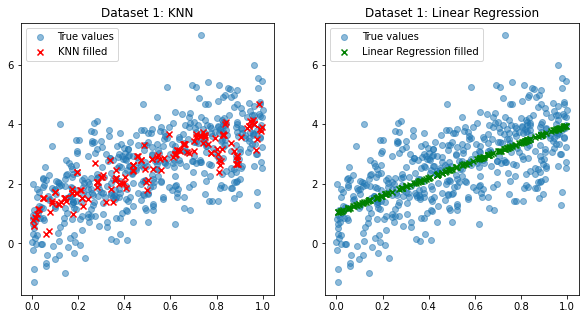

Dataset 2:
KNN R^2: 0.9397733883396692
Linear Regression R^2: 0.8674128743740028


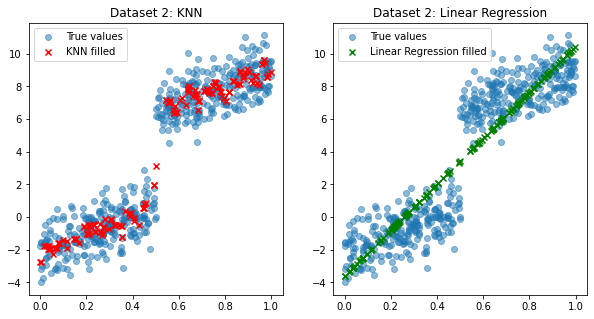

Dataset 3:
KNN R^2: -0.24360395405752744
Linear Regression R^2: 0.04731158442652594


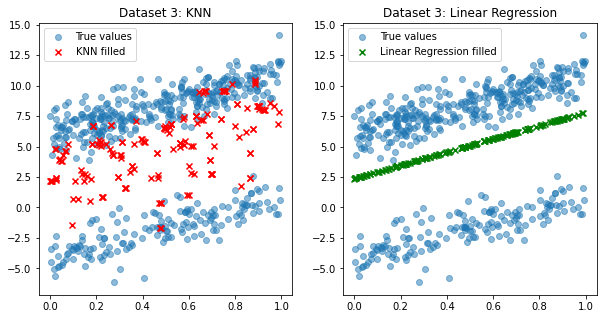

Dataset 4:
KNN R^2: 0.846407908478358
Linear Regression R^2: 0.6868986204999247


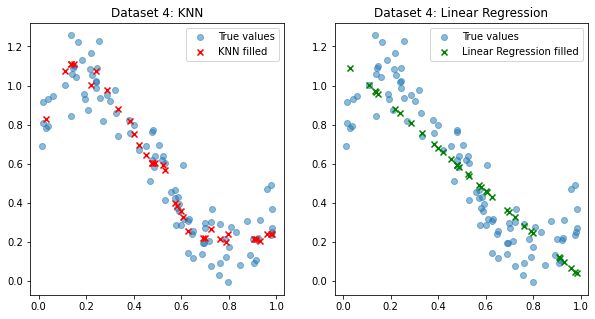

Dataset 5:
KNN R^2: 0.742982176503272
Linear Regression R^2: 0.3234654756683847


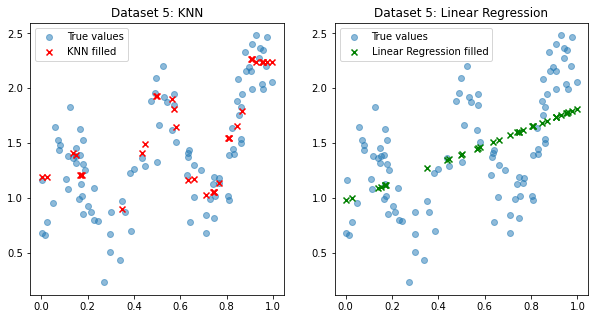

Dataset 6:
KNN R^2: 0.11814831054229447
Linear Regression R^2: 0.2960953816804208


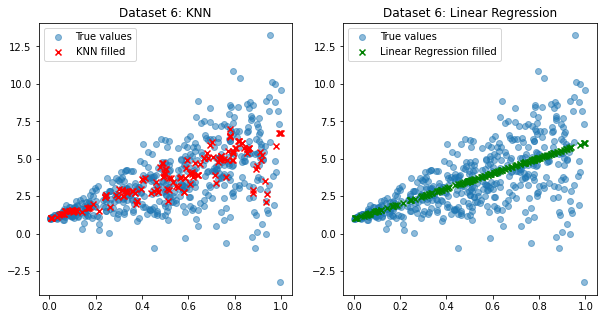

In [5]:
missing_datasets = [pd.read_csv(f"dataset/dataset_{i}_missing.txt") for i in range(1, 7)]
full_datasets = [pd.read_csv(f"dataset/dataset_{i}_full.txt") for i in range(1, 7)]

for i in range(len(missing_datasets)):
    filled_knn = fill_knn(missing_datasets[i])
    filled_lin_reg = fill_lin_reg(missing_datasets[i])

    r2_knn = evaluate_filled_data(filled_knn, full_datasets[i])
    r2_lin_reg = evaluate_filled_data(filled_lin_reg, full_datasets[i])

    print(f"Dataset {i+1}:")
    print(f"KNN R^2: {r2_knn}")
    print(f"Linear Regression R^2: {r2_lin_reg}")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(full_datasets[i].iloc[:, 0], full_datasets[i].iloc[:, 1], label="True values", alpha=0.5)
    plt.scatter(filled_knn.iloc[:, 0], filled_knn.iloc[:, 1], label="KNN filled", marker='x', color='red')
    plt.legend()
    plt.title(f"Dataset {i+1}: KNN")

    plt.subplot(1, 2, 2)
    plt.scatter(full_datasets[i].iloc[:, 0], full_datasets[i].iloc[:, 1], label="True values", alpha=0.5)
    plt.scatter(filled_lin_reg.iloc[:, 0], filled_lin_reg.iloc[:, 1], label="Linear Regression filled", marker='x', color='green')
    plt.legend()
    plt.title(f"Dataset {i+1}: Linear Regression")

    plt.show()


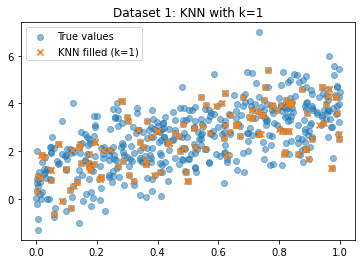

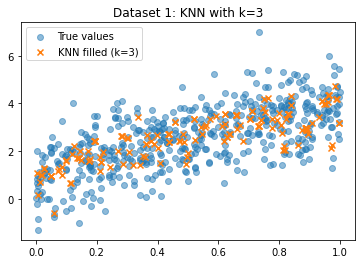

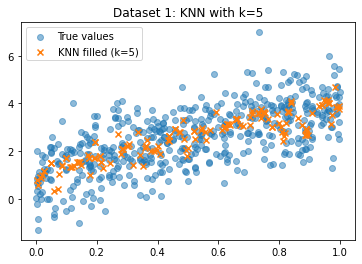

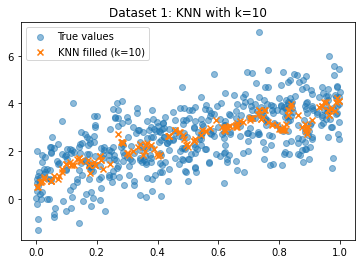

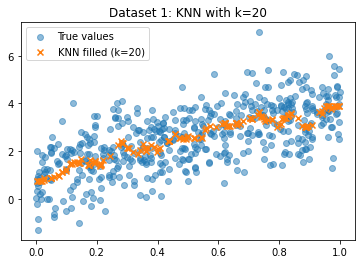

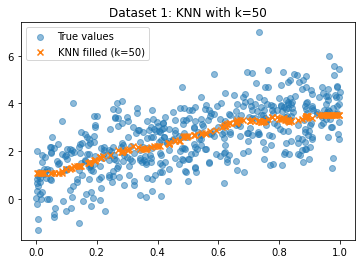

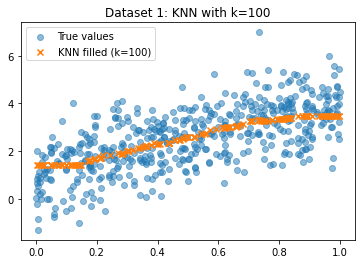

KNN R^2 score for k=1: -0.06806030589259793
KNN R^2 score for k=3: 0.2583102851625514
KNN R^2 score for k=5: 0.3408527792189131
KNN R^2 score for k=10: 0.34768462997228433
KNN R^2 score for k=20: 0.4185312645182555
KNN R^2 score for k=50: 0.4267605840872991
KNN R^2 score for k=100: 0.42839684193092764


In [6]:
k_values = [1, 3, 5, 10, 20, 50, 100]
dataset_1_missing = missing_datasets[0]
dataset_1_full = full_datasets[0]

r2_scores = []

for k in k_values:
    filled_knn_k = fill_knn(dataset_1_missing, k)
    r2_knn_k = evaluate_filled_data(filled_knn_k, dataset_1_full)
    r2_scores.append(r2_knn_k)

    plt.scatter(dataset_1_full.iloc[:, 0], dataset_1_full.iloc[:, 1], label="True values", alpha=0.5)
    plt.scatter(filled_knn_k.iloc[:, 0], filled_knn_k.iloc[:, 1], label=f"KNN filled (k={k})", marker='x')
    plt.legend()
    plt.title(f"Dataset 1: KNN with k={k}")
    plt.show()

for i, k in enumerate(k_values):
    print(f"KNN R^2 score for k={k}: {r2_scores[i]}")


**Explanation:**

#### Model Performance: 
- From the visual results we can see that KNN model is able to capture trends better compared to Linear Regression. (Eg. Dataset: 1, 6) 
- Linear regression performs better than KNN when the relationship between the independent and dependent variables is linear or approximately linear. (Eg. Dataset 3, 4)


#### Impact of K:
As shown in the results above, 
- A small k value (k=1) can lead to overfitting, where the model becomes highly sensitive to noise in the training data. 
- As the k value increases, the model becomes less sensitive to noise, and the predictions become stable. This can be observed in the improvement of R^2 scores as k increases from 1 to 5. 
- The choice of k has a significant impact on the performance of KNN. The optimal k value depends on the specific dataset

## Problem 3: Is the Best (Linear Model) Good Enough?

In this problem, we will specifically look at conditions under which linear regression excels or fails.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

### Part (a): Introduction to Residual Plots

- Read ``dataset_1_full.txt``. Visualize the dataset and make some initial observations.


- For this data set, what can you say about the following linear fits: 

    1. slope = 0.4, intercept = 0.2
    2. slope = 0.4, intercept = 4
    3. linear regression model


- In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values along with  residuals, as well as a residual histogram. What do these plots reveal?  


- Calculate the R^2 coefficient for all three fits. What do the erors reveal? How do they compare to the residual plots?

**Solution:**

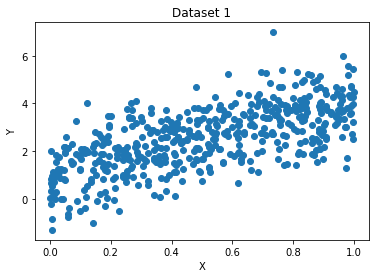

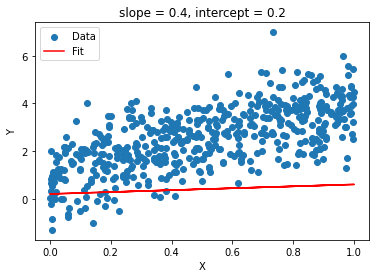

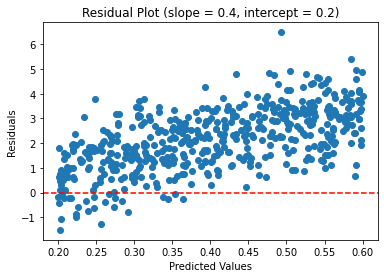

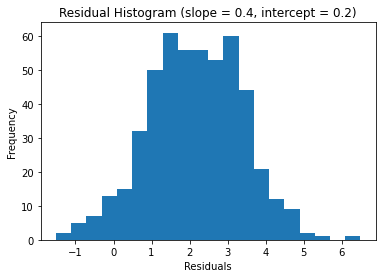

R^2 coefficient for slope = 0.4, intercept = 0.2: -2.544290061794807


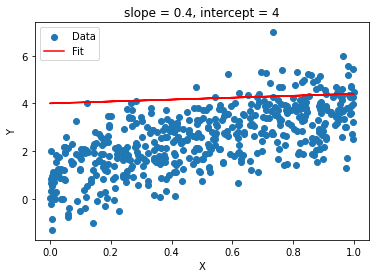

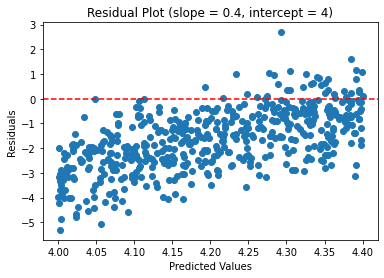

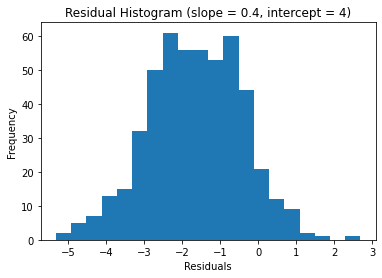

R^2 coefficient for slope = 0.4, intercept = 4: -1.4967753228079568


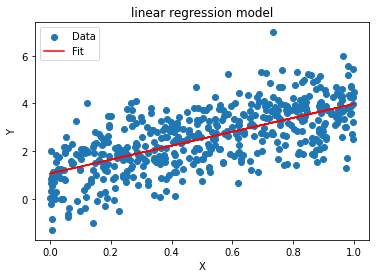

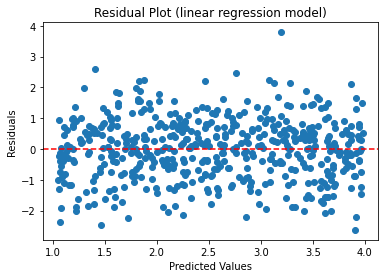

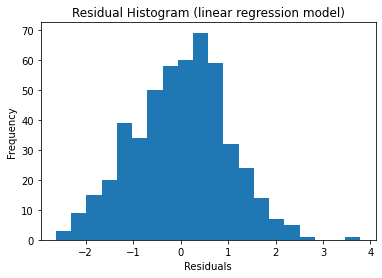

R^2 coefficient for linear regression model: 0.43062152172185075


In [7]:
dataset_1_full = pd.read_csv("dataset/dataset_1_full.txt")

# Visualize dataset
plt.scatter(dataset_1_full.iloc[:, 0], dataset_1_full.iloc[:, 1])
plt.title("Dataset 1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

fits = [
    {"slope": 0.4, "intercept": 0.2, "label": "slope = 0.4, intercept = 0.2"},
    {"slope": 0.4, "intercept": 4, "label": "slope = 0.4, intercept = 4"},
]

X = dataset_1_full.iloc[:, 0].values.reshape(-1, 1)
Y = dataset_1_full.iloc[:, 1].values
lr_model = LinearRegression().fit(X, Y)
fits.append({"slope": lr_model.coef_[0], "intercept": lr_model.intercept_, "label": "linear regression model"})

for fit in fits:
    slope = fit["slope"]
    intercept = fit["intercept"]
    label = fit["label"]
    y_pred = slope * dataset_1_full.iloc[:, 0] + intercept
    residuals = dataset_1_full.iloc[:, 1] - y_pred

    plt.scatter(dataset_1_full.iloc[:, 0], dataset_1_full.iloc[:, 1], label="Data")
    plt.plot(dataset_1_full.iloc[:, 0], y_pred, color="red", label="Fit")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"{label}")
    plt.legend()
    plt.show()

    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color="red", linestyle="--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot ({label})")
    plt.show()

    plt.hist(residuals, bins=20)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title(f"Residual Histogram ({label})")
    plt.show()

    r2 = r2_score(dataset_1_full.iloc[:, 1], y_pred)
    print(f"R^2 coefficient for {label}: {r2}")


**Explanation:**

As shown in the plots above:

- R^2 coefficient for slope = 0.4, intercept = 0.2: -2.544290061794807
- R^2 coefficient for slope = 0.4, intercept = 4: -1.4967753228079568
- R^2 coefficient for linear regression model: 0.42336685047923694

The first two R^2 coefficients indicate that the linear regression model still provides the best fit for the dataset compared to the other two models with fixed slope and intercept values. The negative R^2 values for the first two models suggest that they are not good fits for the data, while the positive R^2 value for the linear regression model indicates that it captures the relationship between the variables reasonably well.

This observation aligns with the residual plots and histograms discussed earlier, which also suggested that the linear regression model is the best fit for the data. By considering the residual plots, histograms, and R^2 coefficients together, we can assess the quality of the fit and determine which model performs better. In this case, the linear regression model outperforms the other two models with fixed slope and intercept values.

### Part (b): What do Residual Plots Reveal?

- Read datasets ``dataset_2_full.txt`` through ``dataset_6_full.txt``. In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values along with  residuals, as well as a residual histogram. What do these plots reveal about the fit of the model? 


- Calculate the R^2 coefficient each fit. What do the erors reveal? How do they compare to the residual plots?


- Based on your analysis, form conjectures regarding the precise relationship between the residual plots and the fit of the linear regression model. Conjecture on the precise conditions under which linear regression model is an appropriate model for a given dataset.

**Solution:**

Dataset 2:


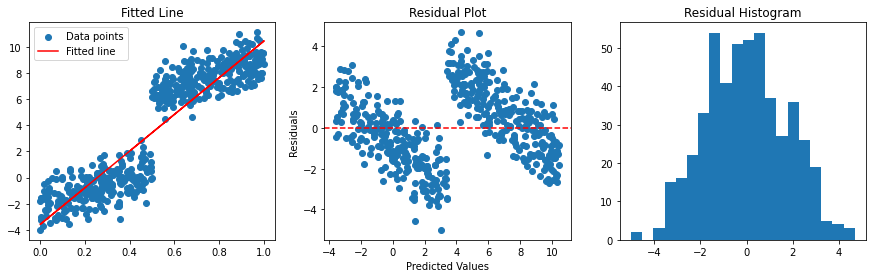

R^2 coefficient: 0.8429571820125753

Dataset 3:


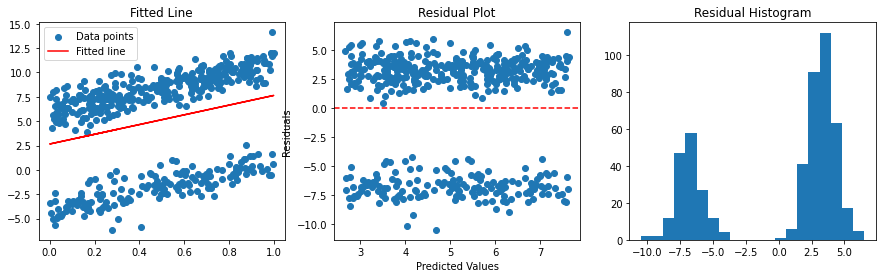

R^2 coefficient: 0.07793541282760785

Dataset 4:


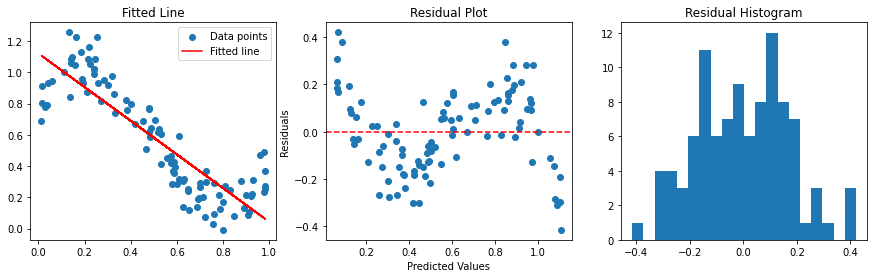

R^2 coefficient: 0.7581022869016055

Dataset 5:


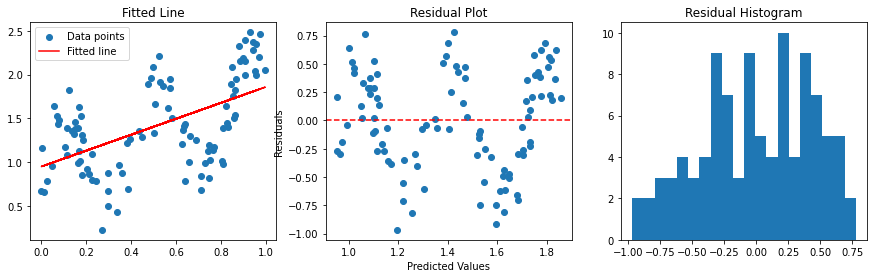

R^2 coefficient: 0.29839298251066615

Dataset 6:


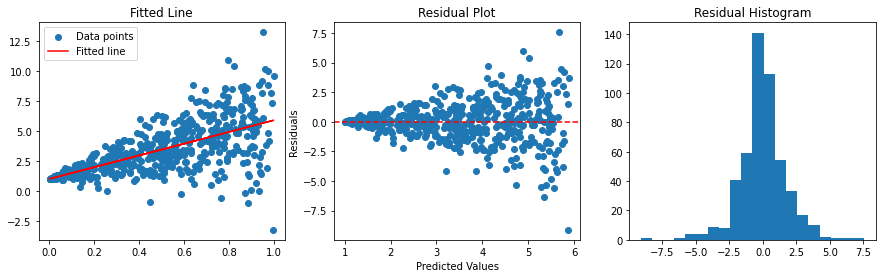

R^2 coefficient: 0.3833923182804857



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def analyze_dataset(filename):

    data = pd.read_csv(filename)

    model = LinearRegression()
    X = data['x'].values.reshape(-1, 1)
    y = data['y'].values
    model.fit(X, y)

    y_pred = model.predict(X)

    residuals = y - y_pred

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
    ax1.scatter(data['x'], data['y'], label='Data points')
    ax1.plot(data['x'], y_pred, color='red', label='Fitted line')
    ax1.set_title('Fitted Line')
    ax1.legend()

    ax2.scatter(y_pred, residuals)
    ax2.axhline(y=0, color='red', linestyle='--')
    ax2.set_title('Residual Plot')
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Residuals')

    ax3.hist(residuals, bins=20)
    ax3.set_title('Residual Histogram')

    plt.show()

    r2 = r2_score(y, y_pred)
    print(f"R^2 coefficient: {r2}")

for i in range(2, 7):
    print(f"Dataset {i}:")
    analyze_dataset(f"dataset/dataset_{i}_full.txt")
    print()


**Explanation:**

Dataset 2: Model peforms really well with an r2 score of 84%. The histogram also looks balanced. <br>
Dataset 3: Poor performance with r2 score of 7.7%. The histogram also looks very split which is a result of poor distribution <br>
Dataset 4: The model performs decent with an r2 score of 75% but the histogram is quite scattered. <br>
Dataset 5: Poor performance with r2 score of 29%. The histogram seems to be all over the place. <br>
Dataset 6: The histogram looks good but the result isnt reflected on the model which has a score of 38%


## Challenge Problem (only for 552 students): Combining Random Variables

This problem, we explore the distirbution of random variables that result from combining other random variables.

### Part (a): Adding Two Uniformly Distributed Variables

Consider the independent random variables $X\sim U(0, 1)$ and $Y\sim U(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

In [9]:
#Code here

### Part (b): Adding Multiple Uniformly Distributed Variables

Consider three independent random variables $X_1, X_2, X_3 \sim U(0, 1)$. Let $Z$ be the random variable $Z = X_1 + X_2 + X_3$. 

What is the distribution of $Z$? What if you add 10 or 12 independent (standard) uniformly distributed variables? Conjecture on the distribution of 
$$
Z = \lim_{n\to \infty} \sum_{i=1}^n X_i
$$
where $\left\{X_i \right\}$ are independent (standard) uniformly distributed variables.

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

In [10]:
#Code here

### Part (c): Combining Normally Distributed Variables

Consider the independent random variables $X\sim \mathcal{N}(0, 1)$ and $Y\sim \mathcal{N}(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** use properties of expected value and some experimentation.

**Solution:**

In [11]:
#Code here

### Part (d): Product of Normally Distributed Variables

Is the product of two normally distributed variables a normally distributed variable? You should fully explain and support your conlusion. 

**Solution:**

In [12]:
#Code here

---